In [324]:
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import weather_apikey
from citipy import citipy
import random
import numpy as np


In [325]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_apikey}&units={units}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=a98b3d54288e608cce056af91a5de960&units=imperial&q='

In [326]:
rep = 600
lat_min = -90
lat_max = 90
def lat(lat_min, lat_max, rep): 
    latitudes = [] 
  
    for x in range(rep): 
        latitudes.append(random.randint(lat_min, lat_max)) 
  
    return latitudes 
  
latitudes = (Rand(lat_min, lat_max, rep)) 

In [327]:
rep = 600
long_min = -180
long_max = 180
def long(long_min, long_max, rep): 
    longitudes = [] 
  
    for y in range(rep): 
        longitudes.append(random.randint(long_min, long_max)) 
  
    return longitudes
  
longitudes = (Rand(long_min, long_max, rep)) 


In [328]:
cities_df = pd.DataFrame({"Latitudes": latitudes, "Longitudes": longitudes})


In [329]:
cities_df["City"] = ""
cities_df["Country code"] = ""
cities_df.head()

,Latitudes,Longitudes,City,Country code
0,-29,-158,,
1,1,87,,
2,86,82,,
3,-13,-111,,
4,26,-105,,


In [330]:
for index, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitudes"],row["Longitudes"])
    cities_df.at[index, "City"] = city.city_name   
    cities_df.at[index,"Country code"]=city.country_code
cities_df.head()

,Latitudes,Longitudes,City,Country code
0,-29,-158,avarua,ck
1,1,87,hambantota,lk
2,86,82,dikson,ru
3,-13,-111,puerto ayora,ec
4,26,-105,santa maria del oro,mx


In [331]:
cities_df = cities_df.drop_duplicates()
print(len(cities_df))

597


In [344]:
cities_df.to_csv('cities.csv')

In [332]:
cities = cities_df['City'].tolist()

In [333]:
# set up lists to hold reponse info
lat = []
temp = []
humidity = []
clouds =[]
wind = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except:
        lat.append("na")
        temp.append("na")
        humidity.append("na")
        clouds.append("na")
        wind.append("na")
     

In [334]:
weather_dict = {
    "city": cities,
    "latitude": lat,
    "temperature": temp,
    "humidity": humidity,
    "cloudiness": clouds,
    "max windspeed": wind
    }
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,latitude,temperature,humidity,cloudiness,max windspeed
0,avarua,-21.21,84.2,83,90,14.99
1,hambantota,6.12,71.6,94,20,8.05
2,dikson,73.51,13.08,95,64,23.73
3,puerto ayora,-0.74,82.4,65,20,14.99
4,santa maria del oro,25.95,56.28,30,12,18.03
5,yellowknife,62.45,15.8,92,90,11.41
6,albany,42.65,25.3,61,40,5.82
7,salalah,17.01,71.6,73,20,5.82
8,bonavista,48.65,29.1,100,88,46.44
9,saskylakh,71.97,-3.08,62,8,11.21


In [335]:
weather_data = weather_data[weather_data.latitude != "na"]
weather_data.dtypes

city             object
latitude         object
temperature      object
humidity         object
cloudiness       object
max windspeed    object
dtype: object

In [337]:
weather_data['latitude'] = pd.to_numeric(weather_data['latitude'])
weather_data['temperature'] = pd.to_numeric(weather_data['temperature'])
weather_data['humidity'] = pd.to_numeric(weather_data['humidity'])
weather_data['cloudiness'] = pd.to_numeric(weather_data['cloudiness'])
weather_data['max windspeed'] = pd.to_numeric(weather_data['max windspeed'])
weather_data.dtypes

C:\Users\Jojo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jojo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jojo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

city              object
latitude         float64
temperature      float64
humidity           int64
cloudiness         int64
max windspeed    float64
dtype: object

In [338]:
weather_data.count()

city             548
latitude         548
temperature      548
humidity         548
cloudiness       548
max windspeed    548
dtype: int64

In [339]:
weather_data = weather_data.sample(n=500)
weather_data.count()

city             500
latitude         500
temperature      500
humidity         500
cloudiness       500
max windspeed    500
dtype: int64

In [345]:
weather_data.to_csv('weather_data.csv')

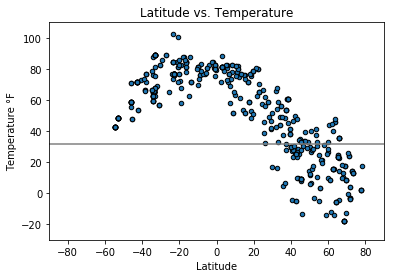

In [346]:
weather_data.plot(kind="scatter",x="latitude", y="temperature", grid=False, edgecolor="black")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")
plt.axhline(32, color='grey')
plt.ylim(-30, 110)
plt.xlim(-90, 90)
plt.savefig("Lat_Temp.png")
plt.show()

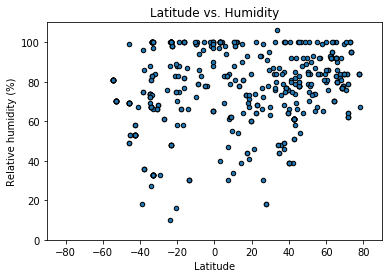

In [347]:
weather_data.plot(kind="scatter",x="latitude",y="humidity",grid=False, edgecolor="black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Relative humidity (%)")
plt.ylim(0, 110)
plt.xlim(-90, 90)
plt.savefig("Lat_Hum.png")
plt.show()

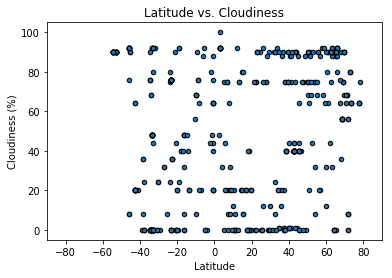

In [348]:
weather_data.plot(kind="scatter",x="latitude",y="cloudiness",grid=False, edgecolor="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5, 105)
plt.xlim(-90, 90)
plt.savefig("Lat_Cloud.png")
plt.show()

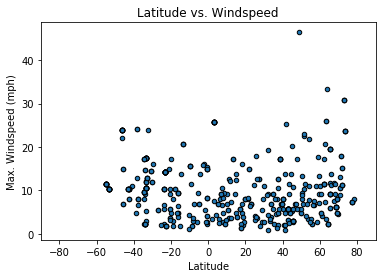

In [349]:
weather_data.plot(kind="scatter",x="latitude",y="max windspeed",grid=False, edgecolor="black")
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Max. Windspeed (mph)")
plt.xlim(-90, 90)
plt.savefig("Lat_wind.png")
plt.show()